In [121]:
# import Libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px

In [122]:
# Get working directory
current_dir=os.getcwd()

# Go one directory up to root directory
project_root_dir=os.path.dirname(current_dir)

# Define paths to the data folders
data_dir=os.path.join(project_root_dir,'data')
raw_dir=os.path.join(data_dir,'raw')
processed_dir=os.path.join(data_dir,'processed')

# Define paths to results folders
result_dir=os.path.join(project_root_dir,'results')

# Define paths to Docs folder
docs_dir=os.path.join(project_root_dir,'docs')

# Create a directories if they do not exists

os.makedirs(raw_dir,exist_ok=True)
os.makedirs(processed_dir,exist_ok=True)
os.makedirs(result_dir,exist_ok=True)
os.makedirs(docs_dir,exist_ok=True)

In [123]:
stream_data_filename=os.path.join(processed_dir,"cleaned_stream_data.csv")
stream_df=pd.read_csv(stream_data_filename)
stream_df.head()

,User_ID,User_Name,Join_Date,Last_Login,Monthly_Price,Watch_Hours,Favorite_Genre,Active_Devices,Profile_Count,Parental_Controls,...,Average_Rating_Given,Has_Downloaded_Content,Membership_Status,Loyalty_Points,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
0,2518,Amber,5/15/2023,12/13/2024,7.99,49,Action,3,6,True,...,3.3,False,Active,2878,Smartphone,35-44,Late Night,0-50,2000-2999,Mature Streamers
1,6430,Patrick,4/3/2023,12/15/2024,7.99,161,Drama,1,2,True,...,4.0,False,Active,2291,Desktop,25-34,Evening,101-200,2000-2999,Adult Streamers
2,1798,Robert,8/2/2023,12/14/2024,11.99,87,Action,2,5,False,...,3.1,False,Active,1692,Desktop,35-44,Late Night,51-100,1000-1999,Mature Streamers
3,5255,Cole,1/31/2023,12/2/2024,15.99,321,Sci-Fi,1,5,False,...,4.6,False,Active,952,Desktop,25-34,Evening,301-500,0-999,Adult Streamers
4,2854,Jamie,6/6/2023,12/15/2024,11.99,386,Documentary,1,4,True,...,3.7,False,Active,1823,Desktop,25-34,Late Night,301-500,1000-1999,Adult Streamers


In [124]:
stream_df.shape

(1000, 26)

In [125]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    1000 non-null   int64  
 1   User_Name                  1000 non-null   object 
 2   Join_Date                  1000 non-null   object 
 3   Last_Login                 1000 non-null   object 
 4   Monthly_Price              1000 non-null   float64
 5   Watch_Hours                1000 non-null   int64  
 6   Favorite_Genre             1000 non-null   object 
 7   Active_Devices             1000 non-null   int64  
 8   Profile_Count              1000 non-null   int64  
 9   Parental_Controls          1000 non-null   bool   
 10  Total_Movies_Watched       1000 non-null   int64  
 11  Total_Series_Watched       1000 non-null   int64  
 12  Country                    1000 non-null   object 
 13  Payment_Method             1000 non-null   object

## Summary Statistics
### Numerical Varible

In [127]:
stream_df.describe()

,User_ID,Monthly_Price,Watch_Hours,Active_Devices,Profile_Count,Total_Movies_Watched,Total_Series_Watched,Recommended_Content_Count,Average_Rating_Given,Loyalty_Points
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5610.52100,12.026000,254.516000,3.04600,3.460000,515.897000,99.746000,51.482000,4.01030,2444.217000
std,2566.98922,3.238702,140.667264,1.42966,1.749703,282.697585,58.452238,29.323498,0.58459,1434.619603
min,1003.00000,7.990000,10.000000,1.00000,1.000000,12.000000,1.000000,0.000000,3.00000,3.000000
25%,3587.75000,7.990000,136.000000,2.00000,2.000000,273.750000,48.750000,26.000000,3.50000,1251.500000
50%,5694.00000,11.990000,256.000000,3.00000,3.000000,510.000000,103.000000,52.500000,4.00000,2423.000000
75%,7794.25000,15.990000,373.250000,4.00000,5.000000,770.750000,150.000000,77.000000,4.50000,3660.000000
max,9996.00000,15.990000,500.000000,5.00000,6.000000,1000.000000,200.000000,100.000000,5.00000,4990.000000


### categorical Variable

In [129]:
stream_df.describe(include='object')

,User_Name,Join_Date,Last_Login,Favorite_Genre,Country,Payment_Method,Language_Preference,Membership_Status,First_Device_Used,Age_Group,Primary_Watch_Time,Watch_Hour_Group,Loyalty_Point_Group,Age_Category
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,340,540,30,7,7,4,6,1,5,5,4,5,5,5
top,Michael,4/17/2023,11/29/2024,Horror,USA,PayPal,Mandarin,Active,Tablet,45-54,Late Night,301-500,1000-1999,Older Streamers
freq,25,6,48,157,158,269,179,1000,215,208,271,408,215,208


In [130]:
#if you want values
stream_df['Favorite_Genre'].value_counts()

Favorite_Genre
Horror         157
Action         150
Comedy         146
Romance        146
Drama          142
Documentary    130
Sci-Fi         129
Name: count, dtype: int64

In [131]:
stream_df['Country'].value_counts()

Country
USA          158
France       151
UK           150
Germany      146
Australia    140
Canada       139
India        116
Name: count, dtype: int64

In [132]:
stream_df['Payment_Method'].value_counts()

Payment_Method
PayPal            269
Cryptocurrency    254
Debit Card        249
Credit Card       228
Name: count, dtype: int64

In [133]:
stream_df['Language_Preference'].value_counts()

Language_Preference
Mandarin    179
French      171
English     168
German      167
Hindi       162
Spanish     153
Name: count, dtype: int64

In [134]:
stream_df['First_Device_Used'].value_counts()

First_Device_Used
Tablet        215
Smartphone    209
Smart TV      209
Desktop       189
Laptop        178
Name: count, dtype: int64

In [135]:
stream_df['Age_Group'].value_counts()

Age_Group
45-54    208
35-44    207
55+      205
25-34    200
18-24    180
Name: count, dtype: int64

In [136]:
stream_df['Age_Category'].value_counts()

Age_Category
Older Streamers     208
Mature Streamers    207
Senior Streamers    205
Adult Streamers     200
Young Streamers     180
Name: count, dtype: int64

In [137]:
stream_df['Primary_Watch_Time'].value_counts()

Primary_Watch_Time
Late Night    271
Evening       256
Afternoon     251
Morning       222
Name: count, dtype: int64

In [138]:
stream_df['Watch_Hour_Group'].value_counts()

Watch_Hour_Group
301-500     408
101-200     210
201-300     201
0-50         93
51-100       88
Name: count, dtype: int64

In [139]:
stream_df['Loyalty_Point_Group'].value_counts()

Loyalty_Point_Group
1000-1999     215
0-999         207
2000-2999     196
3000-3999     191
4000-4990     191
Name: count, dtype: int64

## KPI Calculations

### Average Watch Hours per Age group

In [142]:
age_category_counts = stream_df["Age_Category"].value_counts().reset_index()
age_category_counts.columns = ["Age_Category", "User_Count"]
age_category_counts

,Age_Category,User_Count
0,Older Streamers,208
1,Mature Streamers,207
2,Senior Streamers,205
3,Adult Streamers,200
4,Young Streamers,180


In [143]:
age_category_counts = stream_df["Age_Category"].value_counts().reset_index()
age_category_counts.columns = ["Age_Category", "User_Count"]

fig = px.pie(
    age_category_counts,
    names="Age_Category",
    values="User_Count",
    title="Viewer Age Category Distribution",
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Blues_r
)

fig.update_layout(
    template="presentation",
    height=600,
    width=800,
    legend_title=dict(text="Age Categories"),
    paper_bgcolor="rgba(0, 0, 0, 0)"
)

fig.show()
fig.write_image(os.path.join(result_dir,'Viewer Age Category Distribution.jpg'))
fig.write_image(os.path.join(result_dir,'Viewer Age Category Distribution.png'))
fig.write_html(os.path.join(result_dir,'Viewer Age Category Distribution.html'))

### Favorite genre by Country

In [145]:
Favorite_genre_country = stream_df.groupby(['Country', 'Favorite_Genre']).size().reset_index(name='total').sort_values(by='total', ascending=False)
Favorite_genre_country

,Country,Favorite_Genre,total
18,France,Horror,36
45,USA,Drama,32
36,UK,Comedy,30
21,Germany,Action,28
4,Australia,Horror,27
42,USA,Action,26
19,France,Romance,26
16,France,Documentary,24
12,Canada,Romance,24
13,Canada,Sci-Fi,24


In [146]:
import os
import plotly.express as px

fig = px.bar(
    Favorite_genre_country,
    x='Country',
    y='total',
    color='Favorite_Genre',
    barmode='group',
    title='Genre Preference by Country',
    text='total',
    color_discrete_sequence=px.colors.sequential.Blues_r,
    height=600,   # increased height
    width=1000    # added width for clarity
)

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="User Count",
    legend_title="Favorite Genre",
    template="presentation",
    margin=dict(l=150, r=50, t=100, b=80),  # add margin for y-axis labels and title clarity
    xaxis_tickangle=-45                       # rotate x-axis labels for readability
)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='inside'
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Favorite_genre_by_country_Bar_chart.html'))


### Payment method trends

In [148]:
# Step 1: Compute average monthly price and loyalty points by payment method
pay_trends = stream_df.groupby('Payment_Method')[['Monthly_Price', 'Loyalty_Points']].mean().round(2).reset_index()

# Step 2: Create percentage columns (as % of column total)
pay_trends['Monthly_Price_percentage'] = (pay_trends['Monthly_Price'] / pay_trends['Monthly_Price'].sum() * 100).round(2)
pay_trends['Loyalty_Points_percentage'] = (pay_trends['Loyalty_Points'] / pay_trends['Loyalty_Points'].sum() * 100).round(2)

# (Optional) View the combined dataframe
pay_trends


,Payment_Method,Monthly_Price,Loyalty_Points,Monthly_Price_percentage,Loyalty_Points_percentage
0,Credit Card,11.95,2343.54,24.84,24.01
1,Cryptocurrency,12.26,2469.45,25.49,25.30
2,Debit Card,11.97,2425.82,24.89,24.85
3,PayPal,11.92,2522.76,24.78,25.84


In [149]:
import os
import plotly.express as px

# Melt the DataFrame
melted = pay_trends.melt(
    id_vars='Payment_Method',
    value_vars=['Monthly_Price_percentage', 'Loyalty_Points_percentage'],
    var_name='Metric',
    value_name='Percentage'
)

# Create grouped bar chart with different blue colors per metric and legend
fig = px.bar(
    melted,
    x='Payment_Method',
    y='Percentage',
    color='Metric',  # Color by metric to differentiate bars
    barmode='group',
    title="Payment Method Trends (Monthly Price & Loyalty Points)",
    text='Percentage',
    color_discrete_sequence=px.colors.sequential.Blues_r,  # Blue color scale
    height=500
)

# Text formatting
fig.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='inside',
    marker_line_width=0
)

# Layout styling
fig.update_layout(
    xaxis_title="Payment Method",
    yaxis_title="Percentage (%)",
    template="presentation",
    showlegend=True,  # Show legend
    legend_title_text="Metric",
    margin=dict(l=100, r=50, t=100, b=50),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
)

# Show chart
fig.show()

# Save chart
fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Payment_Method_Trends_Bar_chart.html'))


### Device behavior analysis

In [151]:
# 4. Device Behavior Analysis (Watch Hours)
device_watch = (
    stream_df.groupby('First_Device_Used')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)

device_watch


,First_Device_Used,Average_Watch_Hours
3,Smartphone,271.84
0,Desktop,261.76
2,Smart TV,257.72
4,Tablet,243.98
1,Laptop,235.45


In [152]:
import os
import plotly.express as px

fig = px.bar(
    device_watch,
    x='First_Device_Used',
    y='Average_Watch_Hours',
    title='Device Watching Hours',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],  # Single blue color for all bars
    height=500
)

fig.update_layout(
    xaxis_title='Device Used',
    yaxis_title='Average Watch Hours',
    template='presentation',
    showlegend=False
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside'
)

fig.show()
fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Device_watching_Hours_Bar_chart.html'))


### Watching hours per day

In [154]:

time_watch = (
    stream_df.groupby('Primary_Watch_Time')['Watch_Hours']
    .mean()
    .round(2)
    .reset_index(name='Average_Watch_Hours')
    .sort_values(by='Average_Watch_Hours', ascending=False)
)
time_watch

,Primary_Watch_Time,Average_Watch_Hours
3,Morning,272.33
1,Evening,255.39
0,Afternoon,247.08
2,Late Night,245.98


In [155]:
import os
import plotly.express as px

# Create bar chart with single blue color for all bars
fig = px.bar(
    time_watch,
    x='Primary_Watch_Time',
    y='Average_Watch_Hours',
    title='Watch Hours per Day',
    text='Average_Watch_Hours',
    color_discrete_sequence=['#1f77b4'],  # Single blue color
    template='presentation',
    height=500
)

# Customize layout and text
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside'
)

fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Average Watch Hours',
    showlegend=False
)

# Show the chart
fig.show()

# Save files
fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Watch_Hours_per_Day_Bar_chart.html'))


### Genre rating

In [157]:
genre_ratings = stream_df.groupby('Favorite_Genre')['Average_Rating_Given'].sum().round(2).reset_index(name='total rating').sort_values(by='total rating',ascending=False).reset_index()
genre_ratings

,index,Favorite_Genre,total rating
0,4,Horror,624.5
1,0,Action,599.9
2,1,Comedy,586.5
3,5,Romance,584.5
4,3,Drama,572.0
5,2,Documentary,522.4
6,6,Sci-Fi,520.5


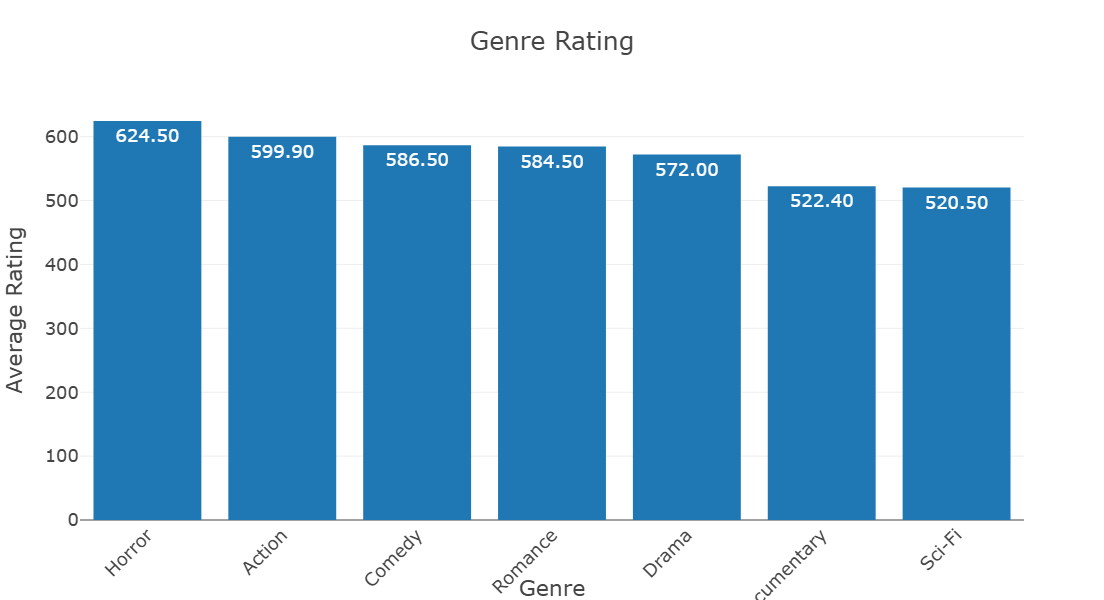

In [158]:
import os
import plotly.express as px

fig = px.bar(
    genre_ratings,
    x='Favorite_Genre',
    y='total rating',
    title='Genre Rating',
    text='total rating',
    color_discrete_sequence=['#1f77b4']  # Single blue color
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='inside',
    showlegend=False  # Hide legend at trace level just in case
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Average Rating',
    xaxis_title='Genre',
    template='presentation',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=600,
    width=1100,
    showlegend=False  # Hide legend at layout level
)

fig.show()

fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart.jpg'))
fig.write_image(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart.png'))
fig.write_html(os.path.join(result_dir, 'Total_Rating_by_Favorite_Genre_Bar_chart.html'))


### Language preference by country

In [160]:
# Step 1: Create a crosstab of language preference by country
lang_country = stream_df.groupby(['Country', 'Language_Preference']).size().reset_index(name='Count')

lang_country


,Country,Language_Preference,Count
0,Australia,English,28
1,Australia,French,27
2,Australia,German,18
3,Australia,Hindi,15
4,Australia,Mandarin,30
5,Australia,Spanish,22
6,Canada,English,22
7,Canada,French,24
8,Canada,German,25
9,Canada,Hindi,26


In [161]:


# Create treemap
fig = px.treemap(
    lang_country,
    path=['Country', 'Language_Preference'],
    values='Count',
    title='Language Preference by Country',
    color='Count',
    color_continuous_scale='Viridis',height=700
    
)

fig.show()
fig.write_image(os.path.join(result_dir,'Language Preference by Country.jpg'))
fig.write_image(os.path.join(result_dir,'Language Preference by Country.png'))
fig.write_html(os.path.join(result_dir,'Language Preference by Country.html'))